In [25]:
# Note that this isn't have the markdown which is included in the report pdf

In [19]:
import os
import collections
cwd = os.getcwd()
directory = os.fsencode(cwd)
directory = directory + b'/data'

In [20]:
data = {"hi":[], "be":[], "te":[]}

In [21]:
def add_data(ln):
    cur = []
    for sent in data_in_file:
        try:
            word,ln_id,tag = sent.split('\t')
            cur.append([word,ln_id,tag.strip()])
        except:
            if len(cur)==0:
                continue
            data[ln].append(cur)
            cur = []

In [22]:
for i,filename in enumerate(os.listdir(directory)):
    filename = filename.decode("utf-8") 
    file = open(f'data/{filename}')
    data_in_file = file.readlines()
    add_data(filename[3:5])

In [23]:
results = {"hi":{}, "be":{}, "te":{}}

In [24]:
for ln in data:
    results[ln]['total_num_sents'] = len(data[ln])

In [8]:
for ln in data:
    avg = 0
    for sent in data[ln]:
        total = len(sent)
        count = 0
        for word in sent:
            if word[1]=='en':
                count+=1
        avg = (avg+(count/total))
    results[ln]['en_per'] = avg/results[ln]['total_num_sents']

In [9]:
for ln in results:
    results[ln]['codemixed_factor'] = results[ln]['en_per']/results['be']['en_per']

In [10]:
pos_tag_counts = {"hi":{}, "be":{}, "te":{}}

In [11]:
for ln in data:
    for sent in data[ln]:
        for word in sent:
            if word[1]=='en':
                if word[2] in pos_tag_counts[ln]:
                    pos_tag_counts[ln][word[2]]+=1
                else:
                    pos_tag_counts[ln][word[2]] = 1

In [12]:
for ln in pos_tag_counts:
    for key in pos_tag_counts[ln]:
        pos_tag_counts[ln][key] = pos_tag_counts[ln][key]/(results[ln]['total_num_sents']*results[ln]['en_per'])

In [13]:
keys_to_be_deleted = []

In [14]:
for ln in pos_tag_counts:
    for key in pos_tag_counts[ln]:
        if key not in pos_tag_counts['hi'] or key not in pos_tag_counts['be'] or key not in pos_tag_counts['te']:
            keys_to_be_deleted.append(key)

In [15]:
keys_to_be_deleted = list(set(keys_to_be_deleted))
keys_to_be_deleted.append('$')
keys_to_be_deleted.append('G_X')
print(keys_to_be_deleted)

['E', 'U', '~', '#', 'null', '@', '$', 'G_X']


In [16]:
for ln in pos_tag_counts:
    for key in keys_to_be_deleted:
        pos_tag_counts[ln].pop(key, None)

In [17]:
import pandas as pd

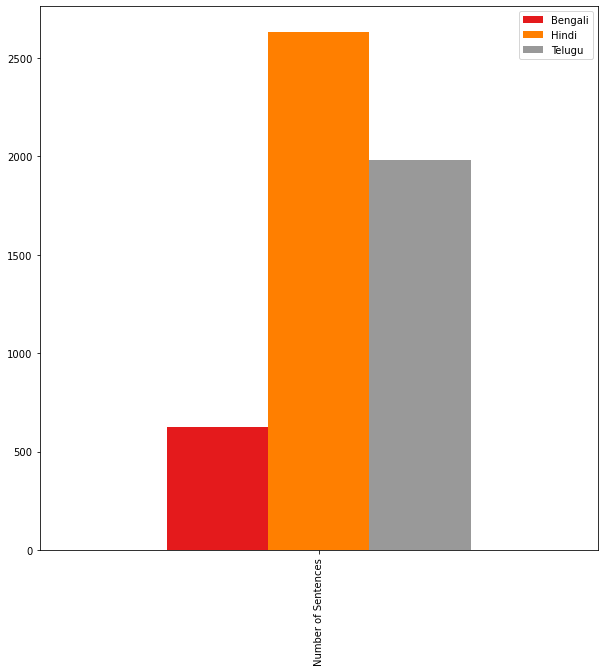

In [18]:
df = pd.DataFrame({"Bengali":results['be']['total_num_sents'],"Hindi":results['hi']['total_num_sents'],"Telugu":results['te']['total_num_sents']}, index=["Number of Sentences"]).plot.bar(figsize=(10,10), width=0.6, colormap='Set1')

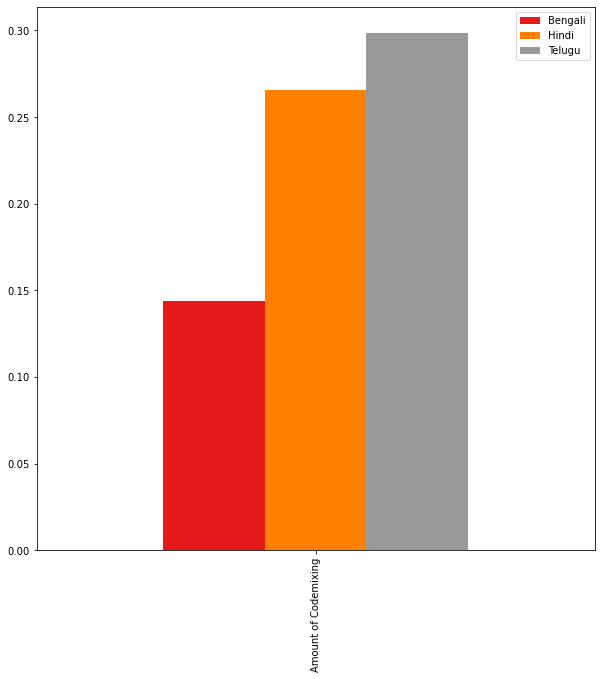

In [19]:
df = pd.DataFrame({"Bengali":results['be']['en_per'],"Hindi":results['hi']['en_per'],"Telugu":results['te']['en_per']}, index=["Amount of Codemixing"]).plot.bar(figsize=(10,10), width=0.6, colormap='Set1')

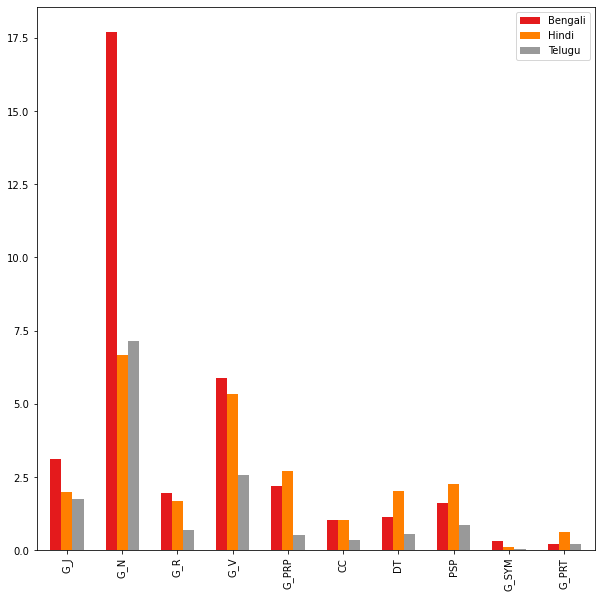

In [20]:
df = pd.DataFrame({"Bengali":pos_tag_counts['be'],"Hindi":pos_tag_counts['hi'],"Telugu":pos_tag_counts['te']}).plot.bar(figsize=(10,10), width=0.6, colormap='Set1')